In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/bostonhoustingmlnd/housing.csv


In [2]:
df=pd.read_csv("/kaggle/input/bostonhoustingmlnd/housing.csv")
Y=df['MEDV'].values.reshape(-1,1)
X=df.drop('MEDV',axis=1)

def preprocess(input):
    mean=input.mean(axis=0)
    input=input/mean
    return input
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
X_train=preprocess(X_train)
Y_train=preprocess(Y_train)

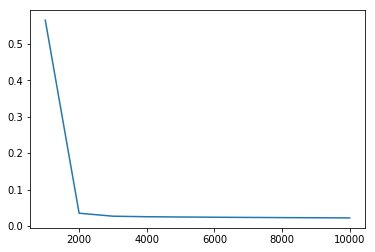

In [3]:


def initialize_weights(X):
    weights=np.zeros(X.shape[1]).reshape(-1,1)
    b=0
    params={
        'w' : weights,
        'b' : b
    }
    return params


def forward_prop(X,w,Y,b):
    
    m=X.shape[0]
    Z=np.dot(w.T,X.T)+b
    c=Z.T-Y
    cost=(1/(2*m))*np.sum(np.multiply(c,c))
    return cost,c,Z

def gradient_desc(c,x,params,learning_rate):
    m=x.shape[0]
    w=params['w'] 
    b=params['b'] 
    
    dw=(1/m)*np.sum(np.multiply(c,x),axis=0).values.reshape(-1,1)
    db=(1/m)*np.sum(c) 
    
    w=w-learning_rate*dw
    b=b-learning_rate*db
    
    params['w']=w
    params['b']=b
    
    return params

def model(X,Y):
    
    weights=initialize_weights(X)
    w=weights['w']
    b=weights['b']
    
    costs=[]
    for i in range(0,10000):
        
        cost,diff,Z=forward_prop(X,w,Y,b)
        updated_weights=gradient_desc(diff,X,weights,learning_rate=0.005)
        
        w=updated_weights['w']
        b=updated_weights['b']
        
        if (i%1000)==0:
            costs.append(cost)
            
    return updated_weights,costs

optimized_weights,costs=model(X_train,Y_train)
lis=[1000,2000,3000,4000,5000,6000,7000,8000,9000,10000]
plt.plot(lis,costs)

In [4]:
mean=Y_test.mean(axis=0)
X_test=preprocess(X_test)
Y_test=preprocess(Y_test)
print(Y_test)
final_cost,diff,predicted_weights=forward_prop(X_test,optimized_weights['w'],Y_test,optimized_weights['b'])
print(final_cost)
predicted_weights=predicted_weights*mean
print(predicted_weights)

Yid=[]
for i in range(0,X_test.shape[0]):
    Yid.append(i)

dic = pd.DataFrame.from_records([{'Yid':Yid,'MEDV':predicted_weights}], index='Yid')
my_submission = dic
# you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)

[[0.8606285 ]
 [0.6280262 ]
 [0.99553783]
 [1.10253489]
 [0.96762556]
 [1.16301149]
 [0.64198234]
 [0.65593848]
 [1.62356404]
 [1.47004652]
 [1.14905535]
 [1.06531852]
 [1.54447926]
 [0.404728  ]
 [1.41887402]
 [0.89319282]
 [1.40956992]
 [0.71641508]
 [1.13044717]
 [1.13509921]
 [1.00018988]
 [1.29792082]
 [0.80480395]
 [1.06997057]
 [1.00949397]
 [1.13509921]
 [0.2326023 ]
 [0.64663439]
 [0.70245894]
 [0.93506124]
 [1.13509921]
 [0.47450869]
 [2.04690022]
 [1.00949397]
 [0.89784487]
 [0.7489794 ]
 [1.34909333]
 [1.22814013]
 [0.94436533]
 [0.54894142]
 [0.29307889]
 [0.91180101]
 [1.07462261]
 [1.11183898]
 [0.81410804]
 [0.6280262 ]
 [2.27019842]
 [1.21883604]
 [0.91645305]
 [0.96762556]
 [0.44194437]
 [0.88388873]
 [1.00949397]
 [0.85597645]
 [1.55378335]
 [0.65128643]
 [1.14905535]
 [2.03759613]
 [2.25624229]
 [1.16301149]
 [1.05136238]
 [0.98623374]
 [0.95832147]
 [1.10718694]
 [0.91180101]
 [0.76758758]
 [0.66059053]
 [0.83271623]
 [0.60941802]
 [0.95832147]
 [0.8606285 ]
 [1.03